# Code Along - Olympic Hero


In [1]:
# Path for the Dataset

path = "c:/users/kruti karia/desktop/olympics.csv"

In [2]:
# Import Packages / Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading
Let's start with the simple task of loading the data and do a little bit of renaming.

Instructions :
Load the dataframe from the path using pd.read_csv() and store the dataframe in a variable called 'data'.

In the dataframe, rename the column Total to Total_Medals

Display first 10 records using "head()" function to take a look at the dataframe.

In [6]:
# Read the Data 

data = pd.read_csv(path)

# Rename the column

data.rename(columns = {"Total":"Total_Medals"},inplace=True)

# Display the first 10 Records

data.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


# Summer or Winter
Some Countries love Summer, some Winter. We think it has to do something with their Olympic performance.

For this task we will try to figure out which olympic event does a country perform better in.

Instructions :
Create a new column Better_Event that stores 'Summer','Winter' or 'Both' based on the comparision between the total medals won in Summer event and Winter event (i.e. comparision between the Total_Summer and Total_Winter columns) using "np.where()"function.
         Example of np.where() function:
data = {'name': ['A', 'B', 'C', 'D', 'E'], 
        'age': [12, 66, 22, 80, 7], 
        'gender': ['M', 'F', 'F', 'M', 'M'],
        }
df = pd.DataFrame(data, columns = ['name', 'age', 'gender'])

print("dataframe before: \n",df)

"""
Creating a new column called senior_citizen where the value is yes 
if df.age is greater than 60 and no if not
"""
df['senior_citizen'] = np.where(df['age']>=60, 'yes', 'no')
print("dataframe after:\n",df)
Output

dataframe before: 

   name  age gender
0    A   12      M
1    B   66      F
2    C   22      F
3    D   80      M
4    E    7      M

dataframe after:
   name  age gender senior_citizen
0    A   12      M             no
1    B   66      F            yes
2    C   22      F             no
3    D   80      M            yes
4    E    7      M             no
Find out which has been a better event with respect to all the performing countries by using value_counts() function and store it in a new variable called 'better_event'.


In [43]:
# Create a new column to check Summer or Winter Performance 

data['Better_Event'] = np.where(data['Total_Summer'] > data['Total_Winter'],'Summer','Winter')
data['Better_Event'] = np.where(data['Total_Summer'] == data['Total_Winter'],'Both',data['Better_Event'])
# Check the counts for the new Created Column

better_event = data['Better_Event'].value_counts().idxmax()
print("Olympic performance is better in",better_event)

Olympic performance is better in Summer


# Top 10
So we figured out which is a better event for each country. Let's move on to finding out the best performing countries across all events

In this task we will try to find

Which are the top 10 performing teams at summer event (with respect to total medals), winter event and overall?
How many teams are present in all of the three lists above?
Instructions :
Create a new dataframe subset called 'top_countries' with the columns ['Country_Name','Total_Summer', 'Total_Winter','Total_Medals'] only

Drop the last row from 'top_countries'(The last row contains the sum of the medals)

Create a function called 'top_ten' that:

Takes the dataframe 'top_countries' and a column name as parameters.

Creates a new empty list called 'country_list'

Find the top 10 values for that particular column(for e.g. 'Total_Summer') using "nlargest()" function

From the dataframe returned by nlargest function, slices the Country_Name column and stores it in the 'country_list' list

Returns the 'country_list'

    Example of 'nlargest()' function :
df = pd.DataFrame({'ID': [1, 2, 3, 4, 5],
                 'Score': [33, 92, 26, 75, 80]})

print("The dataframe:\n",df)
# Filtering the 3 largest scores and getting the IDs associated with it
top_3=df.nlargest(3, 'Score')
print("df having top 3 scores:")
print(top_3)
print("IDs associated to top 3:")
print(list(top_3['ID']))
Output

The dataframe:
    ID  Score
0   1     33
1   2     92
2   3     26
3   4     75
4   5     80
df having top 3 scores:
   ID  Score
1   2     92
4   5     80
3   4     75
IDs associated to top 3:
[2, 5, 4]
Parameters :

parameter	dtype	Argument Type	default value	description
variable1	pandas.DataFrame	compulsory		dataframe to be loaded
variable2	string	compulsory		column name
Returns:

returns	dtype	description
variable1	list	list containing countries names
Call the 'top_ten()' function for the three columns :Total_Summer,Total_Winter and Total_Medals and store their respective results in lists called 'top_10_summer', 'top_10_winter' and 'top_10'

Create a new list 'common' that stores the common elements between the three lists('top_10_summer', 'top_10_winter' and 'top_10')


In [167]:
# Create a subset of the Dataframe

top_countries = data[['Country_Name','Total_Summer','Total_Winter','Total_Medals']]

top_countries = top_countries[:-1]

# Defining a Function to extract top 10 Country Names

def top_ten(df,column_name):
    
    country_list = list((df.nlargest(10,column_name)['Country_Name']))
    
    return(country_list)
    
# Call the Fucntion on the different columns to extract Country Names

top_10_summer = top_ten(top_countries,'Total_Summer')

top_10_winter = top_ten(top_countries,'Total_Winter')

top_10 = top_ten(top_countries,'Total_Medals')


# Combine all extract common top ten country names in a common list

common = list(set(top_10_summer) & set(top_10_winter) & set(top_10))
print("Commonn Countries are",common[0],',',common[1],',',common[2],',',common[3])

Commonn Countries are Soviet Union , Sweden , Germany , United States


# Plotting Top 10
From the lists that you have created from the previous task, let's plot the medal count of the top 10 countries for better visualisation

Instructions :
Take the three previously created lists(top_10_summer, top_10_winter, top_10)

Subset the dataframe 'data' based on the country names present in the list top_10_summer using "isin()" function on the column Country_Name. Store the new subsetted dataframes in 'summer_df'. Do the similar operation using top_10_winter and top_10 and store the subset dataframes in 'winter_df' & 'top_df' respectively.

    Example of isin() function:
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': ['Alpha', 'Beta', 'Gamma','Delta','Epsilon'], 'C':[1, 4, 9, 16, 25]})
#List
List= ['Beta','Epsilon']

#Usage of isin() function
subset_df=df[df['B'].isin(List)]

print(subset_df)
Output

  A        B   C
1  2     Beta   4
4  5  Epsilon  25
Take each subsetted dataframe and plot a bar graph between the country name and total medal count according to the event (For e.g. for 'summer_df' plot a bar graph between Country_Name and Total_Summer)

Modify the axes info accordingly.



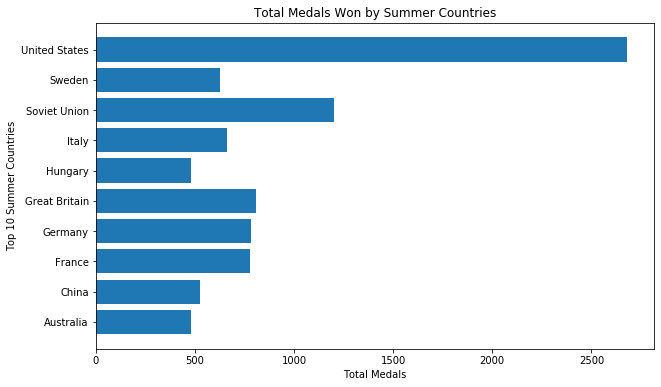

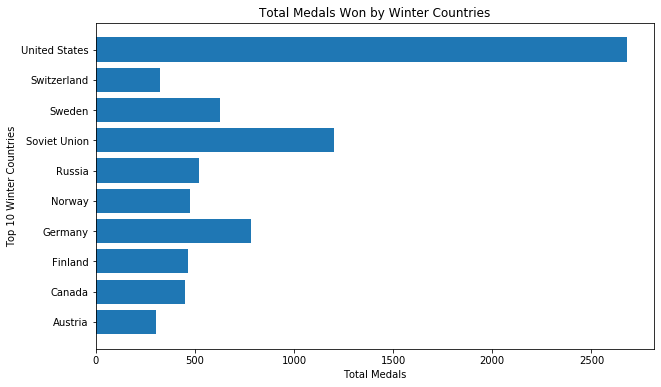

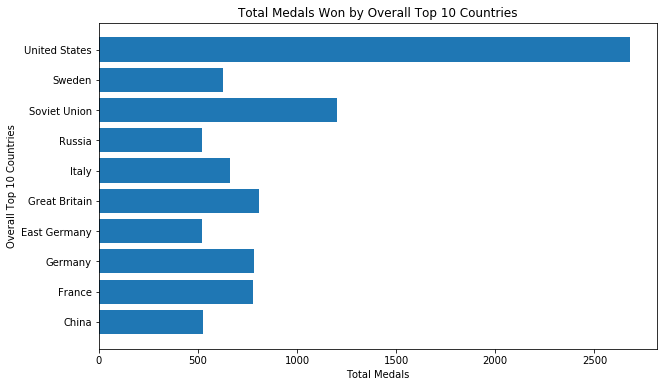

In [180]:
# Using Previously created Dataframe to extract required Data

summer_df = data[data['Country_Name'].isin(top_10_summer)]

winter_df = data[data['Country_Name'].isin(top_10_winter)]

top_df = data[data['Country_Name'].isin(top_10)]

# Plot Bar Graph between Country Name and Total Medal

#Summer Countries

plt.figure(figsize=(10,6))
plt.barh(summer_df['Country_Name'],summer_df['Total_Medals'])
plt.title("Total Medals Won by Summer Countries")
plt.xlabel("Total Medals")
plt.ylabel("Top 10 Summer Countries")
plt.show()

# Winter Countries

plt.figure(figsize=(10,6))
plt.barh(winter_df['Country_Name'],winter_df['Total_Medals'])
plt.title("Total Medals Won by Winter Countries")
plt.xlabel("Total Medals")
plt.ylabel("Top 10 Winter Countries")
plt.show()

# Overal Top 10 Countries

plt.figure(figsize=(10,6))
plt.barh(top_df['Country_Name'],top_df['Total_Medals'])
plt.title("Total Medals Won by Overall Top 10 Countries")
plt.xlabel("Total Medals")
plt.ylabel("Overall Top 10 Countries")
plt.show()


# Top performing country(Gold)
Winning silver or bronze medals is a big achievement but winning gold is bigger.

Using the above created dataframe subsets, in this task let's find out which country has had the best performance with respect to the ratio between gold medals won and total medals won.

Instructions :
In the dataframe 'summer_df'(created in the previous function) , create a new column Golden_Ratio which is the quotient after dividing the two columns Gold_Summer and Total_Summer.

Find the max value of Golden_Ratio and the country associated with it and store them in summer_max_ratio and summer_country_gold respectively.

In the dataframe 'winter_df'(created in the previous function) , create a new column Golden_Ratio which is the quotient after dividing the two columns Gold_Winter and Total_Winter.

Find the max value of Golden_Ratio and the country associated with it and store them in 'winter_max_ratio' and 'winter_country_gold' respectively.

In the dataframe top_df'(created in the previous function) , create a new column Golden_Ratio which is the quotient after dividing the two columns Gold_Total and Total_Medals.

Find the max value of Golden_Ratio and the country associated with it and store them in top_max_ratio' and 'top_country_gold' respectively.

In [213]:
# Create a new column in Previously created Summer_Df to store the ratio of gold Medals achieved in Summer

summer_df['Golden_Ratio'] = summer_df['Gold_Summer'] / summer_df['Total_Summer']

winter_df['Golden_Ratio'] = winter_df['Gold_Winter'] / winter_df['Total_Winter']

top_df['Golden_Ratio'] = top_df['Gold_Total'] / top_df['Total_Medals']

# Extract the Top Performing Country Name 

summer_max_ratio = summer_df['Golden_Ratio'].max()
summer_country_gold = summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']
print("The Country with Max Summer Medals ratio is",summer_country_gold,"with ratio",summer_max_ratio)

winter_max_ratio = winter_df['Golden_Ratio'].max()
winter_country_gold = winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']
print("The Country with Max Summer Medals ratio is",winter_country_gold,"with ratio",winter_max_ratio)

top_max_ratio = top_df['Golden_Ratio'].max()
top_country_gold = top_df.loc[top_df['Golden_Ratio'].idxmax(),'Country_Name']
print("The Country with Max Summer Medals ratio is",top_country_gold,"with ratio",top_max_ratio)


The Country with Max Summer Medals ratio is China with ratio 0.4249471458773784
The Country with Max Summer Medals ratio is Soviet Union with ratio 0.4020618556701031
The Country with Max Summer Medals ratio is China with ratio 0.4049429657794677


C:\Users\Kruti Karia\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kruti Karia\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Kruti Karia\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

# Best in the world
Winning Gold is great but is winning most gold equivalent to being the best overall perfomer? Let's find out.

Instructions :
Drop the last row from the dataframe(The last row contains the total of all the values calculated vertically) and save the result in 'data_1'

Update the dataframe 'data_1' to include a new column called Total_Points which is a weighted value where each gold medal counts for 3 points, silver medals for 2 points, and bronze medals for 1 point.(i.e. You need to take weighted value of Gold_Total, Silver_Total and Bronze_Total)

Find the max value of Total_Points in 'data_1' and the country assosciated with it and store it in variables 'most_points' and 'best_country' respectively.

In [227]:
# Drop the last Row from Data Frame

data_1 = data[:-1]

# Create a new column Total Points 

data_1['Total_Points'] = data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1

# Calculate the Max Points of Total Points and Country Asscoiated with it

most_points = data_1['Total_Points'].max()

best_country = data_1.loc[data_1['Total_Points'].idxmax(),'Country_Name']
print('The maximum points achieved is ', most_points, ' by ', best_country )


The maximum points achieved is  5684  by  United States


C:\Users\Kruti Karia\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Plot for the best
We know which country is best when it comes to winning the most points in Olympic Games. Let's plot the medal count to visualise their success better.

Instructions
Create a single row dataframe called 'best' from 'data' where value of column Country_Name is equal to 'best_country'(The variable you created in the previous task)

Subset 'best' even further by only including the columns : ['Gold_Total','Silver_Total','Bronze_Total']

Create a stacked bar plot of 'best' using "DataFrame.plot.bar()" function

Name the x-axis as United States using "plt.xlabel()"

Name the y-axis as Medals Tally using "plt.ylabel()"

Rotate the labels of x-axis by 45o using "plt.xticks()"



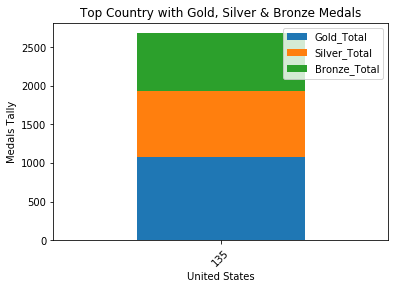

In [237]:
# Create Single Row Dataframe

best = data[data['Country_Name']==best_country]
best = best[['Gold_Total','Silver_Total','Bronze_Total']]

# Plot a Stacked Bar Chart for above created data

best.plot.bar(stacked = True,title = 'Top Country with Gold, Silver & Bronze Medals')
plt.xlabel("United States")
plt.ylabel("Medals Tally")
plt.xticks(rotation=45)
plt.show()